In [1]:
import pandas as pd

In [2]:
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf
stock_symbol = "RELIANCE.NS"  #NSE stocks usually end with .NS
#download stock data
stk_data = yf.download(stock_symbol,start="2023-01-01",end="2023-07-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
stk_data=stk_data[["Open","High","Low","Close"]]

In [4]:
column="Close"

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (122, 1)


In [6]:
training_size = round(len(data1 ) * 0.95)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

116
X_train length: (116, 1)
X_test length: (6, 1)
y_train length: (116, 1)
y_test length: (6, 1)


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
orders=[(0,0,1),(0,0,2)]  # AR = 0 , I = 0 , MA = 1,2
from statsmodels.tsa.arima.model import ARIMA
for td in trends:
        
        #print(td)
        #trendslist.append(td)
    model = ARIMA(X_train, order=(0,0,10),trend=td,)
    model_fit = model.fit()
        # make prediction
    y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
    from sklearn.metrics import r2_score
    mse=mean_squared_error(y_test,y_pred)
    from stockFunctions import rmsemape
    print("Trend={}".format(td))
    rmsemape(y_test,y_pred)
    print("************")

C:\Anaconda3\envs\aidl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=n
RMSE-Testset: 0.08514052342159728
maPe-Testset: 0.24796347825110274
************


C:\Anaconda3\envs\aidl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=t
RMSE-Testset: 0.020170160099575785
maPe-Testset: 0.1645934042380192
************
Trend=c
RMSE-Testset: 0.013298284718536786
maPe-Testset: 0.10957354177906813
************
Trend=ct
RMSE-Testset: 0.009441326067062888
maPe-Testset: 0.10946418566284044
************


C:\Anaconda3\envs\aidl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
len(y_pred)

6

In [13]:
#i=2
td="ct"
model = ARIMA(X_train, order=(0,0,30),trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred)
from stockFunctions import rmsemape
print("Trend={}".format(td))
rmsemape(y_test,y_pred)
print("************")

Trend=ct
RMSE-Testset: 0.018791098616577264
maPe-Testset: 0.14744161698542443
************


C:\Anaconda3\envs\aidl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


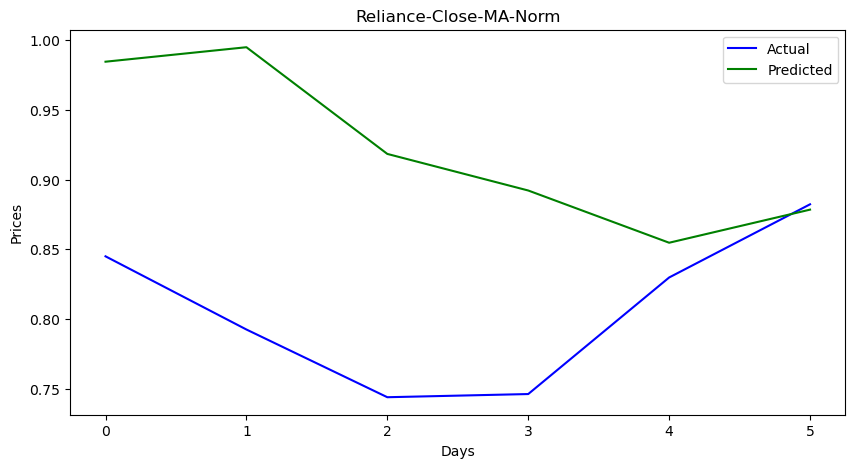

In [15]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","Reliance-Close-MA-Norm","Days","Prices")

In [16]:
len(data1)

122

In [17]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [18]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

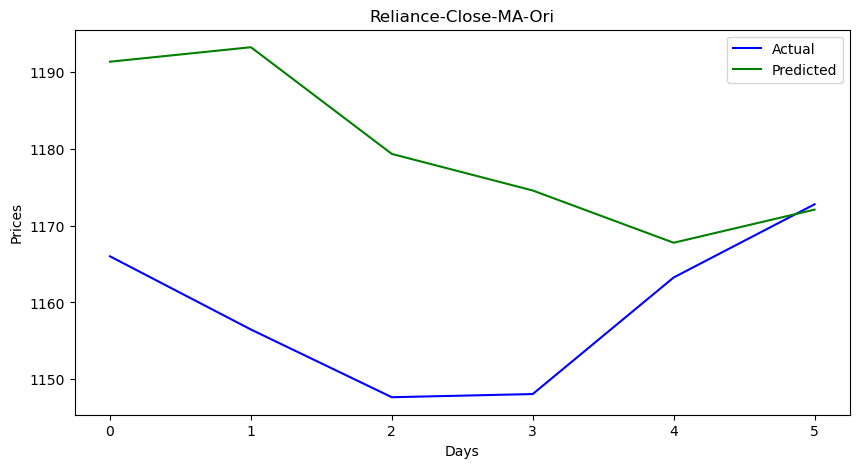

In [19]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Reliance-Close-MA-Ori","Days","Prices")

In [20]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 621.7773273129078
maPe-Testset: 0.01813999322759967


In [21]:
forecast=model_fit.predict(len(data1), len(data1))

In [22]:
forecast

array([0.85036841])

In [23]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [24]:
forecast_stock_price_test_oriF

,Closefore
0,1166.985696


In [25]:
forecast_stock_price_test_oriF.to_csv("CloseMA.csv",index=False)